# Proyek Analisis Data: E-COMMERCE
- **Nama:** MUHAMMAD DEAN FITRAH
- **Email:** deanfitrah@gmail.com
- **ID Dicoding:** deanftrh

## Menentukan Pertanyaan Bisnis

- Bagaimana tren performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

- Kota mana yang memiliki jumlah user terbanyak dan kota mana yang menghasilkan revenue tertinggi?

- Metode pembayaran mana yang paling sering digunakan pelanggan?
        
- Siapa pelanggan terbaik berdasarkan frekuensi dan jumlah transaksi?



## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Load Tabel Customer**

In [4]:
customers_df = pd.read_csv("/Users/deanfitrah/Projects/python/proyek_analisis_data/dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Load Tabel Orders**

In [5]:
orders_df = pd.read_csv("/Users/deanfitrah/Projects/python/proyek_analisis_data/dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
order_payments_df = pd.read_csv("/Users/deanfitrah/Projects/python/proyek_analisis_data/dataset/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- Daftar dataset yang diperlukan:
    - customers_dataset
    - orders_dataset
    - order_payments_dataset
- seluruh dataset yang diperlukan dapat di load dengan baik


### Assessing Data

#### Menilai data customer

In [7]:
print(customers_df.info())
print("\n", customers_df.isna().sum())
print("\nJumlah duplikasi: ",customers_df.duplicated().sum())
customers_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight hasil assesing data customer:**
- tidak ada masalah dengan tipe data
- jumlah data sudah konsisten (tidak ada perbedaan jumlah data)
- tidak ada missing value
- tidak ada duplikasi data

Overall data customer sudah clean

#### Menilai data orders

In [8]:
print(orders_df.info())
print("\nMissing Value:\n", orders_df.isna().sum())
print("\nJumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Missing Value:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delive

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight hasil assesing data orders:**
- tipe data date belum sesuai:
    - order_purchase_timestamp
    - order_approved_at
    - order_delivered_carrier_date
    - order_delivered_customer_date
    - order_estimated_delivery_date
- terdapat perbedaan jumlah data atau missing value pada kolom:
    - order_approved_at (160)
    - order_delivered_carrier_date (1783)
    - order_delivered_custumer_date (2965)
    missing value disini dikarenakan status order yang tidak delivered, menyebabkan data belum atau tidak direkam
- tidak ada duplikasi data

#### Menilai Data Order Payments

In [9]:
print(order_payments_df.info())
print("\nMissing Value:\n", order_payments_df.isna().sum())
print("\nJumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None

Missing Value:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight hasil assesing data Seller:**
- tidak ada masalah dengan tipe data
- jumlah data sudah konsisten (tidak ada perbedaan jumlah data)
- tidak ada missing value
- tidak ada duplikasi data

Overall data seller sudah clean

**Insight:**
- xxx
- xxx

### Cleaning Data

**Cleaning data orders**

In [10]:
datetime_colomns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_colomns:
    orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

orders_df[orders_df.order_approved_at.isna()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


**Insight Cleaning data Orders:**
- berhasil mengubah type data dari *object* menjadi *date* pada kolom:
    - order_purchase_timestamp
    - order_approved_at
    - order_delivered_carrier_date
    - order_delivered_customer_date
    - order_estimated_delivery_date
- missing value tidak benar benar missing hanya belum atau memang tidak direcord oleh sistem:
    - order_approved_at (160)
    - order_delivered_carrier_date (1783)
    - order_delivered_custumer_date (2965)

sudah clean

**DATA YANG TIDAK PERLU DI CLEANING**
- Data Customer
- Data Order Payments

## Exploratory Data Analysis (EDA)

### Explore customer_df

In [11]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


#### Jumlah Customer berdasarkan Kota

In [53]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

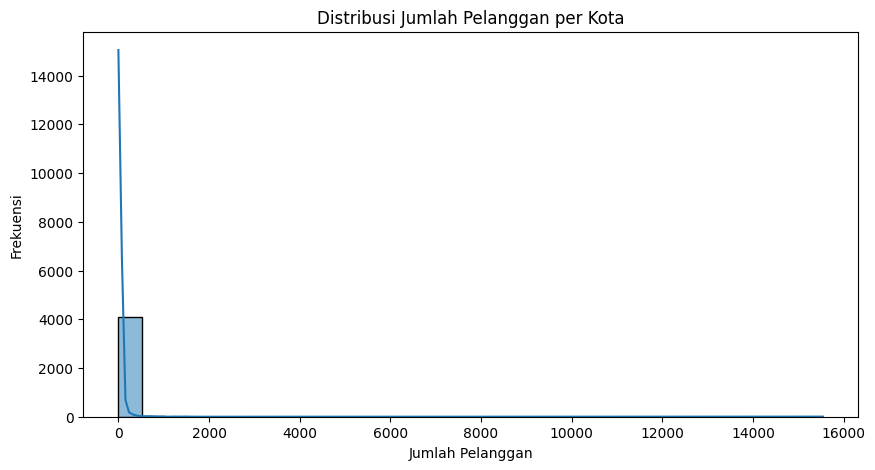

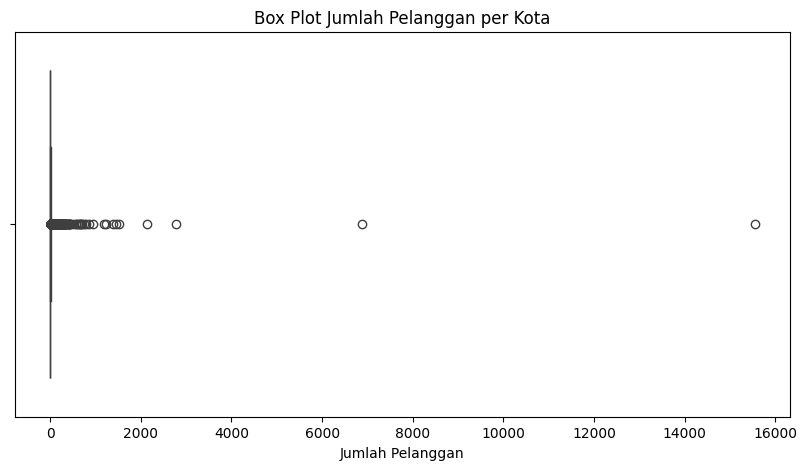

count     4119.000000
mean        24.142025
std        279.272382
min          1.000000
25%          1.000000
50%          3.000000
75%          9.000000
max      15540.000000
Name: customer_id, dtype: float64


In [54]:
# Hitung jumlah unik pelanggan per kota
city_customers = customers_df.groupby(by="customer_city").customer_id.nunique()

# 📊 1. Visualisasi Distribusi dengan Histogram
plt.figure(figsize=(10,5))
sns.histplot(city_customers, bins=30, kde=True)
plt.title("Distribusi Jumlah Pelanggan per Kota")
plt.xlabel("Jumlah Pelanggan")
plt.ylabel("Frekuensi")
plt.show()

# 📊 2. Box Plot untuk melihat outlier
plt.figure(figsize=(10,5))
sns.boxplot(x=city_customers)
plt.title("Box Plot Jumlah Pelanggan per Kota")
plt.xlabel("Jumlah Pelanggan")
plt.show()

# 📊 3. Statistik Deskriptif
print(city_customers.describe())

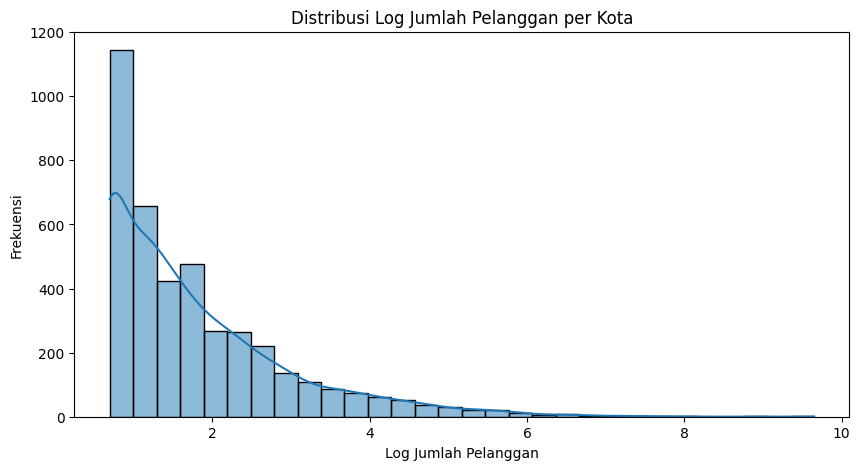

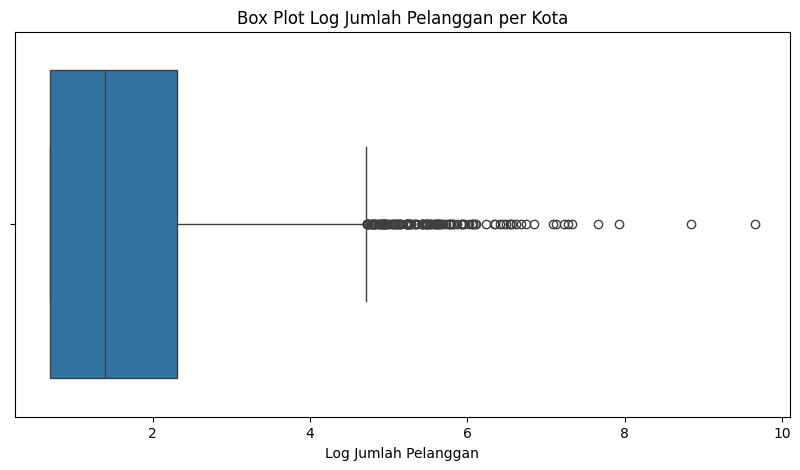

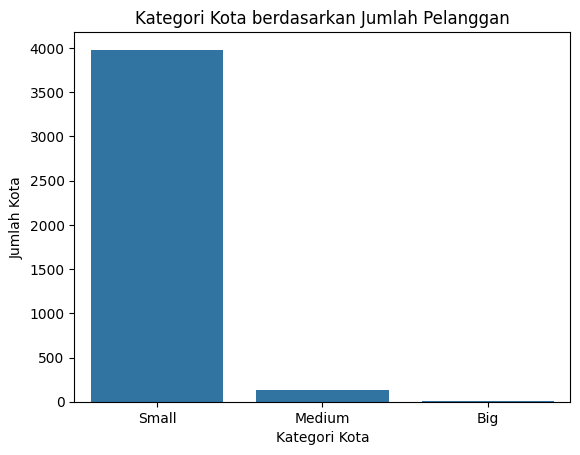

In [57]:
# Terapkan log transformasi (tambahkan +1 untuk menghindari log(0))
city_customers_log = np.log1p(city_customers)

# Visualisasi ulang dengan histogram
plt.figure(figsize=(10,5))
sns.histplot(city_customers_log, bins=30, kde=True)
plt.title("Distribusi Log Jumlah Pelanggan per Kota")
plt.xlabel("Log Jumlah Pelanggan")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=city_customers_log)
plt.title("Box Plot Log Jumlah Pelanggan per Kota")
plt.xlabel("Log Jumlah Pelanggan")
plt.show()

bins = [0, 100, 1000, city_customers.max()]
labels = ["Small", "Medium", "Big"]
city_customers_binned = pd.cut(city_customers, bins=bins, labels=labels)

sns.countplot(x=city_customers_binned)
plt.title("Kategori Kota berdasarkan Jumlah Pelanggan")
plt.xlabel("Kategori Kota")
plt.ylabel("Jumlah Kota")
plt.show()


**Insight:**
- Customer paling banyak berasal dari kota Sao Paulo
- dari grafik Kategori Kota berdasarkan Jumlah Pelanggan, terlihat bahwa kebanyakan pelanggan berasal dari kota kecil karena jumlah kota kecil jauh lebih banyak dibandingkan kota menengah dan besar.

### Explore orders_df

In [13]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


#### Jumlah order berdasarkan status

In [14]:
orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,order_status,order_id
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


**Insight:**
- 96478 order berhasil sampai ke pengguna

### Explore order_payments_df

In [15]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


#### Jumlah Order Berdasarkan Tipe Pembayaran dan payment value

In [16]:
order_payments_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": "sum",
}).sort_values(by="order_id", ascending=False).head()

,order_id,payment_value
payment_type,,
credit_card,76505,12542084.19
boleto,19784,2869361.27
voucher,3866,379436.87
debit_card,1528,217989.79
not_defined,3,0.00


**Insight:**
- Customer paling banyak menggunakan cerdit card sebagai tipe pembayaran dengan payment value 12542084.19

#### Jumlah Order Berdasarkan Payment Installments

In [17]:
order_payments_df.groupby(by="payment_installments").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,payment_installments,order_id
0,1,49060
1,2,12389
2,3,10443
3,4,7088
4,10,5315
5,5,5234
6,8,4253
7,6,3916
8,7,1623
9,9,644


**Insight:**
- Customer paling banyak melakukan pembayaran dengan sekali bayar

### Explore data orders_df dan customers_df

In [18]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


#### Customer_id dengan urutan order paling banyak

In [19]:
orders_customers_df.groupby(by="customer_unique_id").agg({
    "order_id": "nunique",
    "customer_city": "first",
    "customer_state": "first",
}).sort_values(by="order_id", ascending=False).head()

,order_id,customer_city,customer_state
customer_unique_id,,,
8d50f5eadf50201ccdcedfb9e2ac8455,17,sao paulo,SP
3e43e6105506432c953e165fb2acf44c,9,praia grande,SP
6469f99c1f9dfae7733b25662e7f1782,7,santos,SP
ca77025e7201e3b30c44b472ff346268,7,recife,PE
1b6c7548a2a1f9037c1fd3ddfed95f33,7,ituiutaba,MG


**Insight:**
- Customer paling banyak melakukan order dengan ID : 8d50f5eadf50201ccdcedfb9e2ac8455 dengan total order 17

#### Kota dengan order paling banyak

In [20]:
orders_customers_df.groupby(by="customer_city").agg({
    "order_id": "nunique",
    "customer_state": "first",
}).sort_values(by="order_id", ascending=False).head()

,order_id,customer_state
customer_city,,
sao paulo,15540,SP
rio de janeiro,6882,RJ
belo horizonte,2773,MG
brasilia,2131,DF
curitiba,1521,PR


**Insight:**
- Kota dengan order paling banyak yaitu sao paulo

#### State dengan order paling banyak

In [21]:
orders_customers_df.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "customer_city": "first",
}).sort_values(by="order_id", ascending=False).head()

,order_id,customer_city
customer_state,,
SP,41746,sao paulo
RJ,12852,nilopolis
MG,11635,ouro preto
RS,5466,santa rosa
PR,5045,congonhinhas


**Insight:**
- State dengan order paling banyak yaitu SP

### Explore all_df

In [22]:
all_df = pd.merge(
    left=order_payments_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,4291db0da71914754618cd789aebcd56,18570,conchas,SP


#### customer_unique_id dengan pembayaran terbesar

In [23]:
all_df.groupby(by="customer_unique_id").agg({
    "order_id": "nunique",
    "payment_value": "sum",
}).sort_values(by="payment_value", ascending=False).head()

,order_id,payment_value
customer_unique_id,,
0a0a92112bd4c708ca5fde585afaa872,1,13664.08
46450c74a0d8c5ca9395da1daac6c120,3,9553.02
da122df9eeddfedc1dc1f5349a1a690c,2,7571.63
763c8b1c9c68a0229c42c9fc6f662b93,1,7274.88
dc4802a71eae9be1dd28f5d788ceb526,1,6929.31


**Insight:**
- customer dengan pembayaran terbesar dengan total 13664.08 dengan frekuensi order 1 kali

#### kota dengan pembayaran terbesar

In [24]:
all_df.groupby(by="customer_city").agg({
    "order_id": "nunique",
    "payment_value": "sum",
}).sort_values(by="payment_value", ascending=False).head()

,order_id,payment_value
customer_city,,
sao paulo,15540,2203373.09
rio de janeiro,6882,1161927.36
belo horizonte,2773,421765.12
brasilia,2131,354216.78
curitiba,1521,247392.48


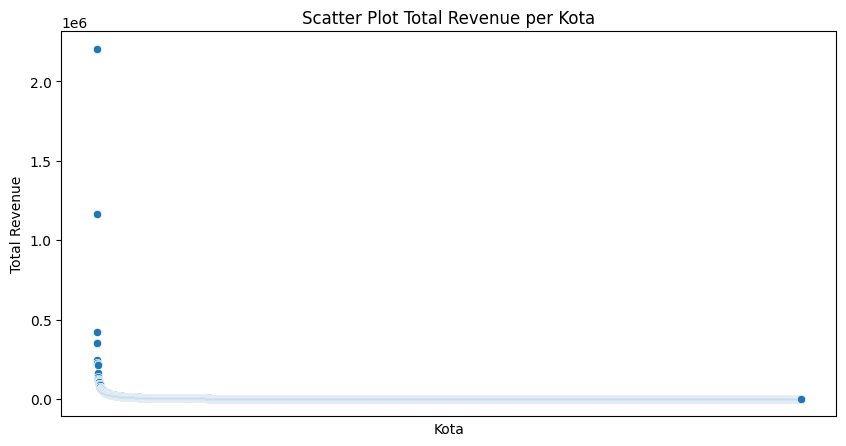

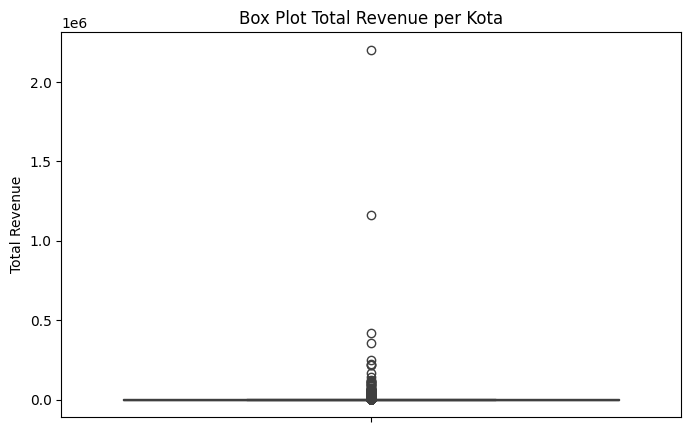

In [65]:
city_revenue = all_df.groupby(by="customer_city").agg({
    "order_id": "nunique",
    "payment_value": "sum",
}).sort_values(by="payment_value", ascending=False)

# Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=city_revenue.index, y=city_revenue["payment_value"])
plt.xticks([], [])  # Menghilangkan label kota agar tidak terlalu padat
plt.xlabel("Kota")
plt.ylabel("Total Revenue")
plt.title("Scatter Plot Total Revenue per Kota")
plt.show()

# Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(y=city_revenue["payment_value"])
plt.ylabel("Total Revenue")
plt.title("Box Plot Total Revenue per Kota")
plt.show()

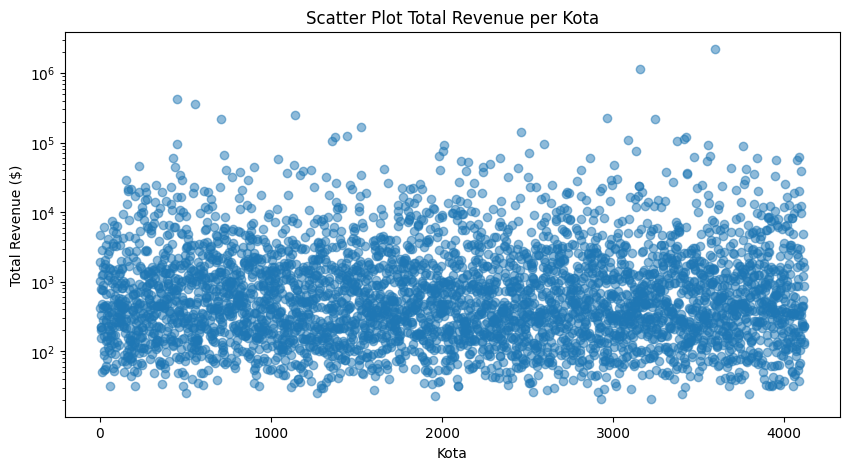

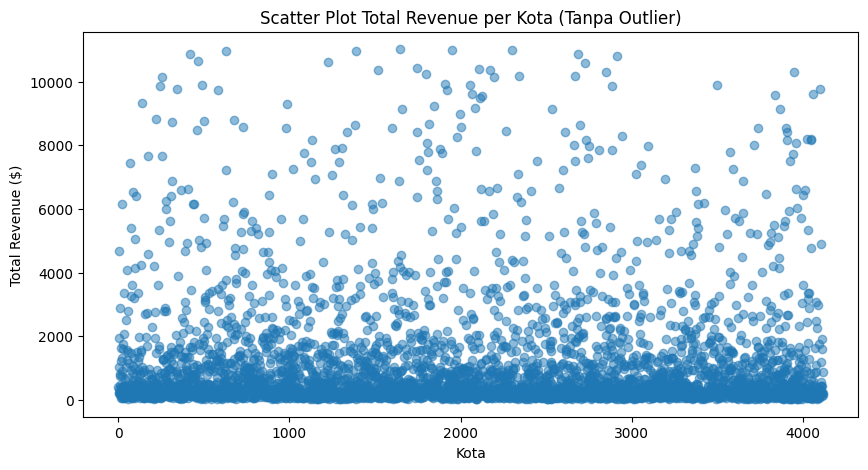

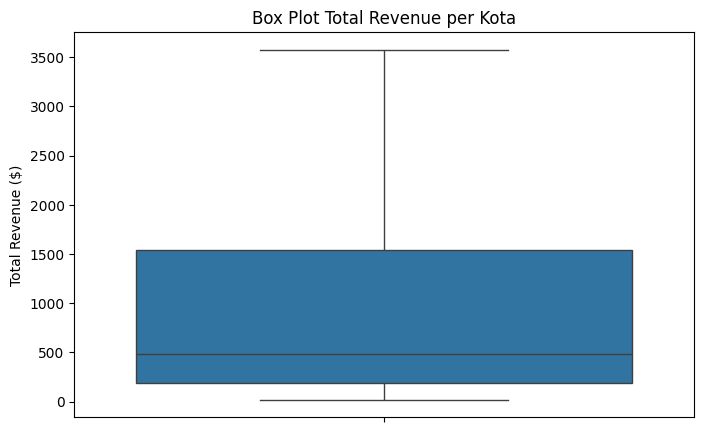

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Mengelompokkan data berdasarkan kota dan menghitung total revenue
city_revenue = all_df.groupby("customer_city")["payment_value"].sum().reset_index()

# Scatter plot dengan skala log agar lebih terbaca
plt.figure(figsize=(10, 5))
plt.scatter(city_revenue.index, city_revenue["payment_value"], alpha=0.5)
plt.yscale("log")
plt.xlabel("Kota")
plt.ylabel("Total Revenue ($)")
plt.title("Scatter Plot Total Revenue per Kota")
plt.show()

# Scatter plot tanpa outlier di atas persentil 95
threshold = np.percentile(city_revenue["payment_value"], 95)
filtered_revenue = city_revenue[city_revenue["payment_value"] <= threshold]

plt.figure(figsize=(10, 5))
plt.scatter(filtered_revenue.index, filtered_revenue["payment_value"], alpha=0.5)
plt.xlabel("Kota")
plt.ylabel("Total Revenue ($)")
plt.title("Scatter Plot Total Revenue per Kota (Tanpa Outlier)")
plt.show()

# Box plot revenue per kota
plt.figure(figsize=(8, 5))
sns.boxplot(y=city_revenue["payment_value"], showfliers=False)  # Menghilangkan outlier
plt.ylabel("Total Revenue ($)")
plt.title("Box Plot Total Revenue per Kota")
plt.show()


**Insight:**
- Ada beberapa kota dengan revenue sangat tinggi (kemungkinan São Paulo, Rio de Janeiro, dll.).
Sebagian besar kota memiliki revenue sangat kecil, yang sesuai dengan pola pelanggan sebelumnya.
Data sangat skewed (tidak merata), dengan long-tail distribution.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Trend dan Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?

In [25]:
all_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,4291db0da71914754618cd789aebcd56,18570,conchas,SP


   order_approved_at  order_count     revenue
0             Oct-16          320    58380.74
1             Nov-16            0        0.00
2             Dec-16            1       19.62
3             Jan-17          760   131835.87
4             Feb-17         1765   291836.22
5             Mar-17         2689   446020.61
6             Apr-17         2374   413537.47
7             May-17         3693   593119.02
8             Jun-17         3252   515293.57
9             Jul-17         3974   585260.30
10            Aug-17         4348   672772.79
11            Sep-17         4301   717821.79
12            Oct-17         4590   782898.61
13            Nov-17         7395  1174911.51
14            Dec-17         5832   902534.69
15            Jan-18         7187  1106076.67
16            Feb-18         6706   984422.01
17            Mar-18         7288  1170383.27
18            Apr-18         6778  1137693.93
19            May-18         7066  1180152.88
20            Jun-18         6164 

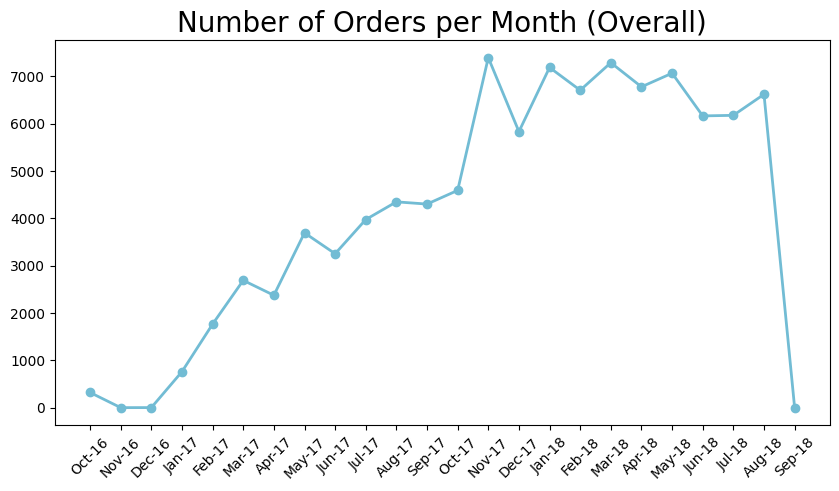

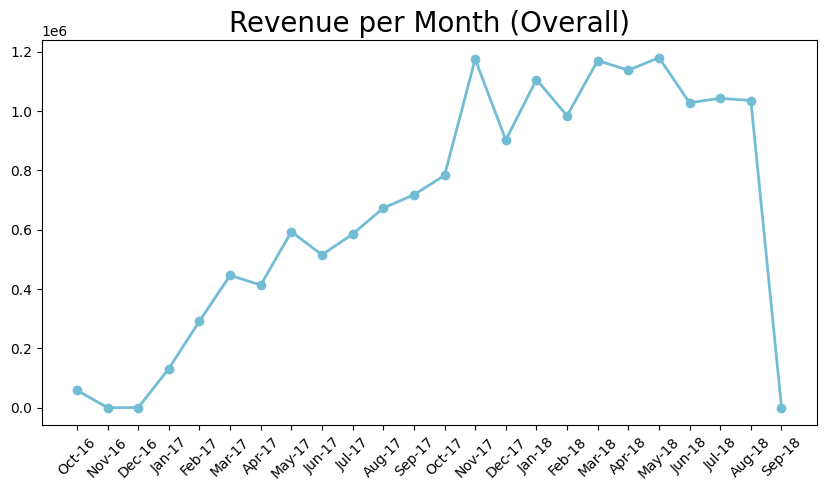

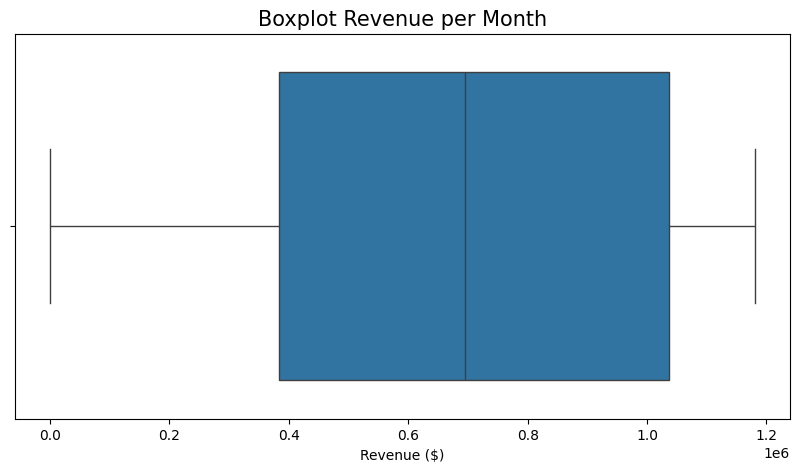

In [68]:
monthly_orders_df = all_df.resample(rule='ME', on='order_approved_at').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%b-%y')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)
print(monthly_orders_df.head(30))

plt.figure(figsize=(10, 5)) 
plt.plot(monthly_orders_df["order_approved_at"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (Overall)", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5)) 
plt.plot(monthly_orders_df["order_approved_at"], monthly_orders_df["revenue"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Revenue per Month (Overall)", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=monthly_orders_df["revenue"])
plt.title("Boxplot Revenue per Month", fontsize=15)
plt.xlabel("Revenue ($)")
plt.show()


**Insight:**

**Tren Pertumbuhan Order**

        Peningkatan signifikan dalam jumlah pesanan: Dimulai dengan 320 pesanan pada Oktober 2016, ada lonjakan pesanan yang sangat besar pada bulan Februari 2017 dengan 1.765 pesanan, dan terus meningkat sepanjang tahun 2017 dan 2018. Pada Juli 2018, jumlah pesanan mencapai 6.176 pesanan per bulan.

        Stabilitas dan penurunan pada akhir periode: Setelah puncaknya pada pertengahan 2018, ada penurunan yang tajam pada September 2018, hanya dengan 1 pesanan yang tercatat.

**Pendapatan (Revenue)**
        
        Kenaikan pendapatan yang sebanding dengan jumlah pesanan: Pendapatan meningkat secara signifikan sepanjang 2017, yang sebanding dengan meningkatnya jumlah pesanan. Misalnya, pada Februari 2017, pendapatan tercatat 291.836,22 namun pada Februari 2018, pendapatan mencapai 984.422,01. Pendapatan terus meningkat seiring dengan jumlah pesanan yang tinggi.

        Pendapatan tertinggi pada bulan November 2017: Pendapatan tertinggi tercatat pada November 2017, dengan 1.174.911,51. Ini mungkin menunjukkan puncak musiman atau promosi yang berhasil meningkatkan jumlah pesanan dan pendapatan.

        Penurunan pada September 2018: Sama halnya dengan jumlah pesanan, pendapatan juga mengalami penurunan yang tajam pada September 2018 dengan hanya 166,40, meskipun ini bisa jadi karena jumlah pesanan yang sangat rendah pada bulan tersebut.

        Dari boxplot yang kamu hasilkan, terlihat bahwa:
        - Median (garis tengah di dalam box) menunjukkan revenue bulanan rata-rata.
        - Interquartile Range (IQR, panjang box) cukup besar, menunjukkan variasi revenue yang signifikan antar bulan.
        - Whiskers (garis di luar box) menunjukkan rentang revenue tanpa outlier.
        - Tidak ada titik di luar whiskers, jadi tidak ada outlier signifikan dalam data revenue bulanan.

### Pertanyaan 2: Kota mana yang memiliki jumlah user terbanyak dan kota mana yang menghasilkan revenue tertinggi?

              customer_city  customer_count  payment_value
3597              sao paulo           14984     2203373.09
3155         rio de janeiro            6620     1161927.36
453          belo horizonte            2672      421765.12
558                brasilia            2069      354216.78
1143               curitiba            1465      247392.48
707                campinas            1398      216248.43
2964           porto alegre            1326      224731.42
3247               salvador            1209      218071.50
1529              guarulhos            1153      165121.99
3428  sao bernardo do campo             908      120434.84


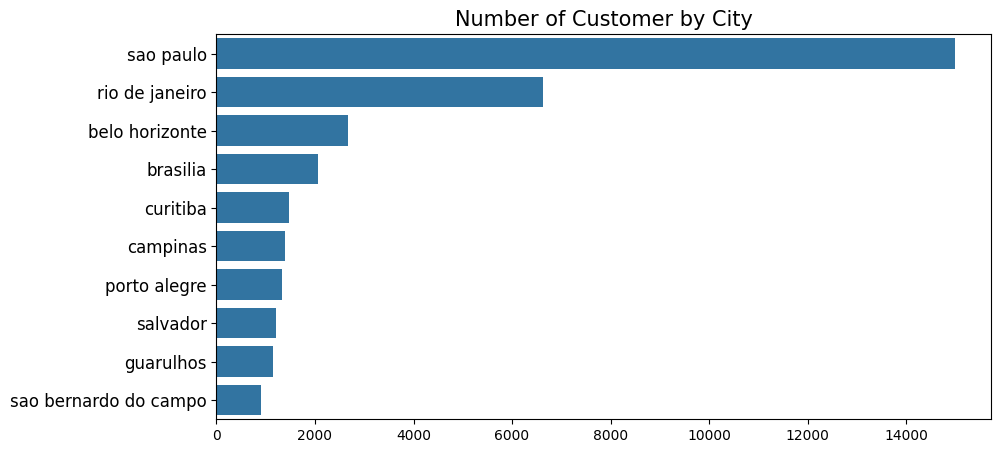

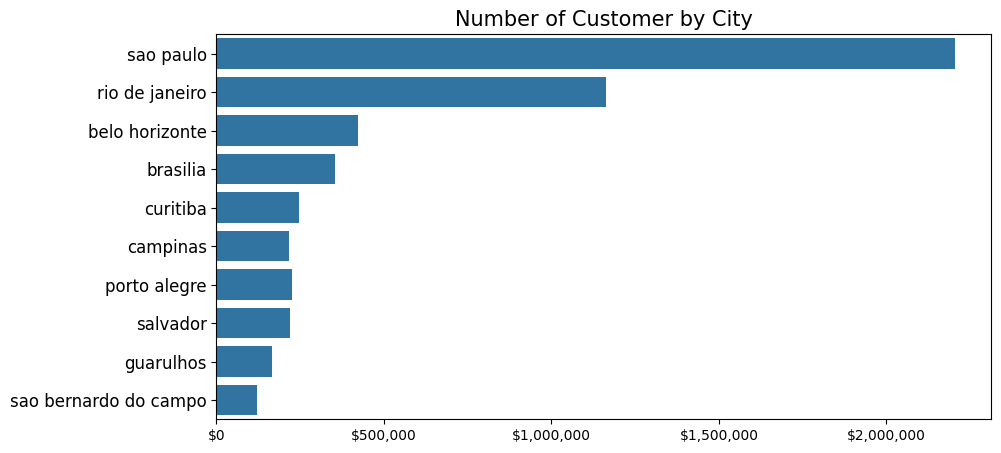

In [69]:
bystate_df = all_df.groupby(by="customer_city").agg({
    "customer_unique_id": "nunique",  # menghitung jumlah customer_id unik
    "payment_value": 'sum',          # menghitung total revenue per kota
}).reset_index()

bystate_df.rename(columns={
    "customer_unique_id": "customer_count",
}, inplace=True)
print(bystate_df.sort_values(by="customer_count", ascending=False).head(10))

# Number of Customer by city
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="customer_city",
    data=bystate_df.sort_values(by="customer_count", ascending=False).head(10),
)
plt.title("Number of Customer by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()


# Total Revenuew by city
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Membuat figure
plt.figure(figsize=(10, 5))

# Membuat barplot
sns.barplot(
    x="payment_value", 
    y="customer_city",
    data=bystate_df.sort_values(by="customer_count", ascending=False).head(10),
)

# Menambahkan judul dan pengaturan label
plt.title("Number of Customer by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)

# Menambahkan simbol '$' pada sumbu x dan menghindari format ilmiah (seperti 1e6)
def currency(x, pos):
    return f'${x:,.0f}'  # Format angka dengan koma sebagai pemisah ribuan dan simbol $

# Mengatur format sumbu x menggunakan FuncFormatter
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency))

# Menampilkan plot
plt.show()


**Insight:**
- Sao Paulo memimpin dengan 15.540 pelanggan dan total revenue sebesar $2203373.09, yang jauh lebih tinggi dibandingkan kota lain. Ini menunjukkan bahwa São Paulo merupakan pusat pasar terbesar, yang kemungkinan berhubungan dengan ukuran populasi kota dan aktivitas ekonomi yang lebih tinggi.

- Sao Paulo dan Rio de Janeiro memiliki jumlah pelanggan yang sangat besar, ini adalah dua kota yang sangat potensial untuk pemasaran, promosi, dan pengembangan produk. Perusahaan bisa memfokuskan upaya mereka di kota-kota ini dengan lebih banyak investasi dalam pemasaran atau memperluas jangkauan produk.

### Pertanyaan 3: Metode Pembayaran yang paling sering digunakan pelanggan dan dan yang menyumbang revenue tertinggi?

In [70]:
all_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": "sum",
}).sort_values(by="order_id", ascending=False).head()




,order_id,payment_value
payment_type,,
credit_card,76505,12542084.19
boleto,19784,2869361.27
voucher,3866,379436.87
debit_card,1528,217989.79
not_defined,3,0.00


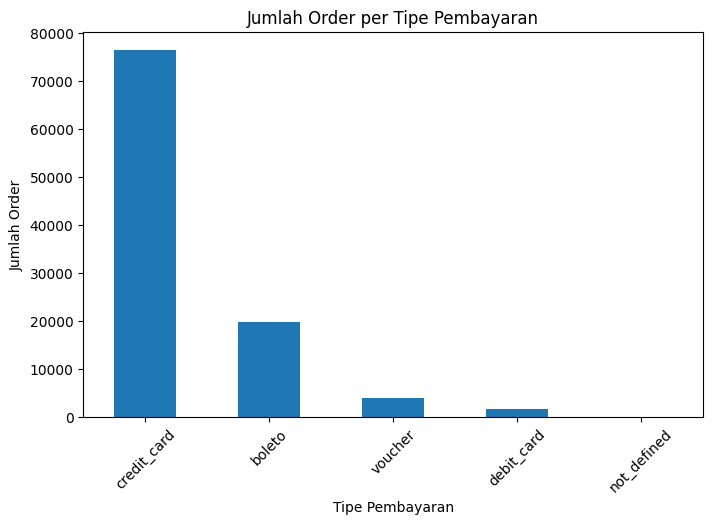

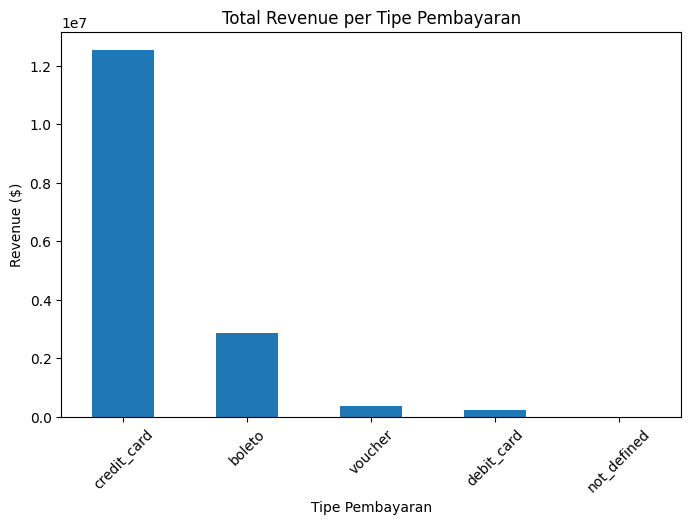

In [76]:

# Data agregasi
payment_df = all_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": "sum",
}).sort_values(by="order_id", ascending=False)

# Plot jumlah order per tipe pembayaran
plt.figure(figsize=(8, 5))
payment_df["order_id"].plot(kind="bar")
plt.title("Jumlah Order per Tipe Pembayaran")
plt.xlabel("Tipe Pembayaran")
plt.ylabel("Jumlah Order")
plt.xticks(rotation=45)
plt.show()

# Plot total revenue per tipe pembayaran
plt.figure(figsize=(8, 5))
payment_df["payment_value"].plot(kind="bar")
plt.title("Total Revenue per Tipe Pembayaran")
plt.xlabel("Tipe Pembayaran")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.show()


**Insight**

- Credit Card Mendominasi 🔝

        Metode pembayaran paling banyak digunakan adalah credit_card, dengan jumlah order jauh lebih tinggi dibanding metode lain. Ini menunjukkan bahwa mayoritas pelanggan lebih memilih kartu kredit untuk transaksi.

- Boleto Sebagai Alternatif Populer 💳

        Boleto menempati posisi kedua, meskipun jumlahnya jauh lebih rendah dibanding kartu kredit. Ini mungkin karena masih ada segmen pelanggan yang lebih nyaman menggunakan metode pembayaran berbasis voucher atau slip pembayaran.

- Metode Pembayaran Lainnya Jauh Lebih Sedikit 📉

        Voucher, debit_card, dan not_defined memiliki jumlah order yang sangat kecil. Hal ini bisa mengindikasikan bahwa pelanggan jarang menggunakan metode pembayaran ini atau tidak banyak platform yang mendukungnya.

### Pertanyaan 4: Siapa pelanggan terbaik berdasarkan frekuensi dan jumlah transaksi?

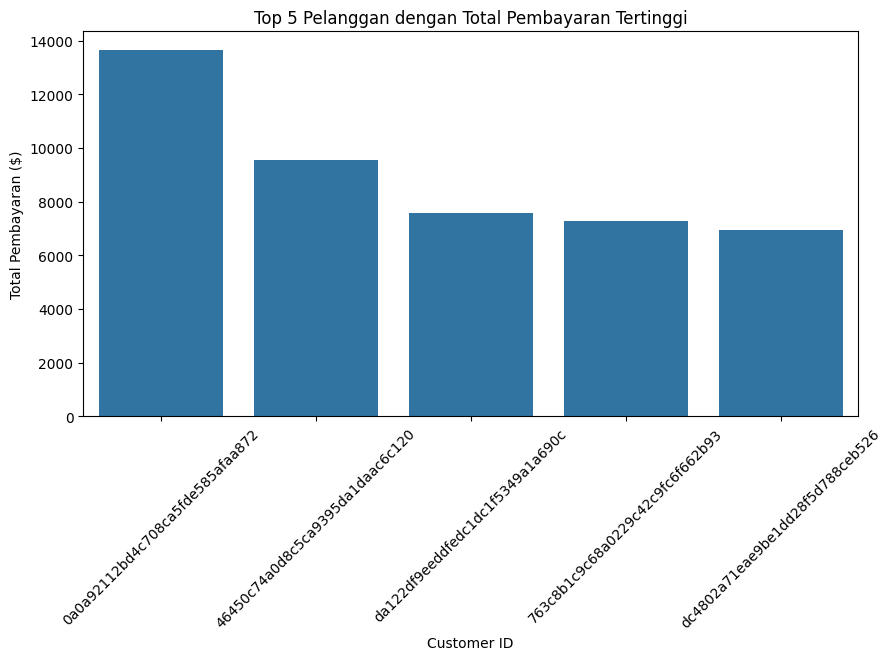

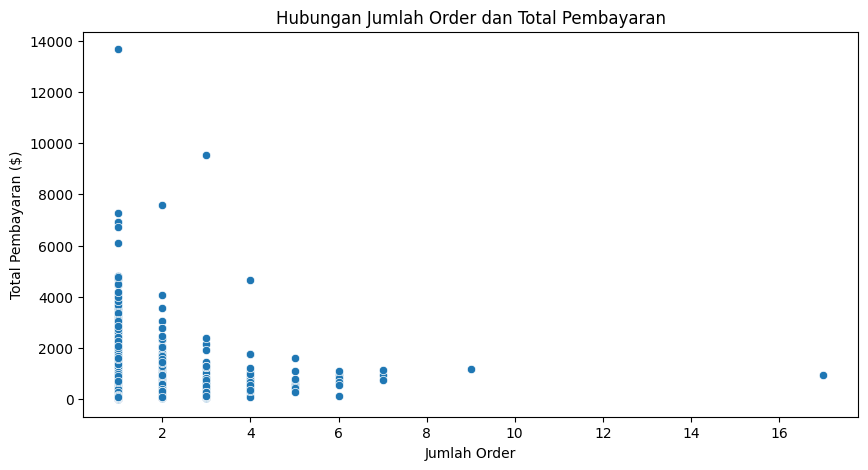

In [82]:
top_customers = all_df.groupby(by="customer_unique_id").agg({
    "order_id": "nunique",
    "payment_value": "sum",
}).sort_values(by="payment_value", ascending=False).head(5)

# Bar Chart: Pelanggan dengan total pembayaran tertinggi
plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_customers.index, 
    y=top_customers["payment_value"],
)
plt.title("Top 5 Pelanggan dengan Total Pembayaran Tertinggi")
plt.xlabel("Customer ID")
plt.ylabel("Total Pembayaran ($)")
plt.xticks(rotation=45)
plt.show()

# Scatter Plot: Hubungan antara jumlah order dan total pembayaran
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=all_df.groupby("customer_unique_id").agg({
        "order_id": "nunique",
        "payment_value": "sum"
    }), 
    x="order_id", 
    y="payment_value",
)
plt.title("Hubungan Jumlah Order dan Total Pembayaran")
plt.xlabel("Jumlah Order")
plt.ylabel("Total Pembayaran ($)")
plt.show()

**Insightt**

- Pelanggan dengan Total Pembayaran Tertinggi
    
        Pelanggan dengan ID "0a092112bd4c708c5fd6e585afaa872" adalah pelanggan dengan total pembayaran tertinggi, mencapai lebih dari $14.000.
    
        Pelanggan lainnya memiliki total pembayaran yang lebih rendah, dengan pelanggan kedua sekitar $10.000 dan yang ketiga sekitar $7.500.
- Distribusi Pembayaran
    
        Ada gap yang cukup besar antara pelanggan dengan total pembayaran tertinggi dan pelanggan lainnya. Ini menunjukkan bahwa pelanggan teratas ini kemungkinan besar melakukan pembelian dalam jumlah besar atau membeli produk bernilai tinggi.
    
        Empat pelanggan lainnya memiliki total pembayaran yang lebih seimbang, berkisar antara $7.000 hingga $10.000.

## Analisis Lanjutan RFM: Bagaimana pola pembelian pelanggan di e-commerce ini?

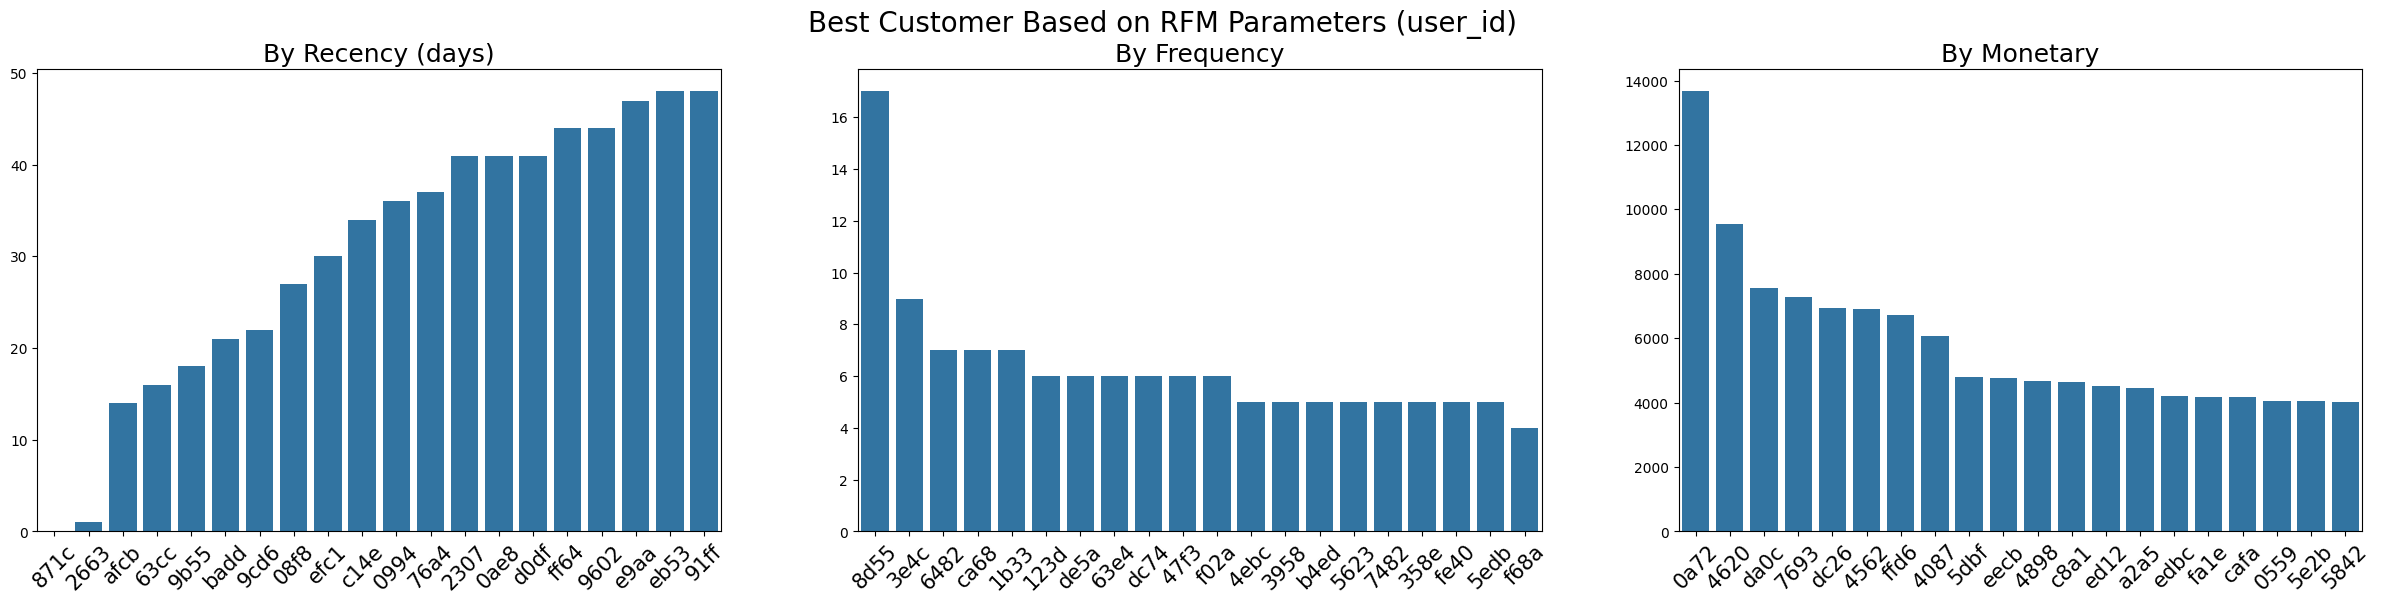

In [26]:
rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "payment_value": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

rfm_df["short_id"] = rfm_df["customer_unique_id"].apply(lambda x: x[:2] + "" + x[-2:])

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

sns.barplot(y="recency", x="short_id", data=rfm_df.sort_values(by="recency", ascending=True).head(20), ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(y="frequency", x="short_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(20), ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='x', rotation=45)

sns.barplot(y="monetary", x="short_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(20), ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].tick_params(axis='x', rotation=45)


plt.suptitle("Best Customer Based on RFM Parameters (user_id)", fontsize=20)
plt.show()

**Recency (Seberapa Baru Pembelian Terakhir)**

Interpretasi:
- Pelanggan dengan ID 871c, 2663, dan afcb melakukan pembelian paling baru (nilai recency rendah).
- Sebaliknya, pelanggan dengan ID seperti e9aa, eb53, dan 91ff sudah lama tidak bertransaksi (nilai recency tinggi).

Insight: 
- Fokus pada pelanggan dengan nilai recency tinggi untuk retargeting, seperti diskon atau reminder email untuk meningkatkan engagement mereka.

============

**Frequency (Seberapa Sering Pelanggan Bertransaksi)**

Interpretasi:
- Pelanggan dengan ID 8d55 adalah pelanggan paling sering melakukan transaksi (lebih dari 16 kali).
- Pelanggan lainnya memiliki frekuensi yang jauh lebih rendah, dengan sebagian besar berada di kisaran 4-8 kali transaksi.

Insight:
- Pelanggan dengan transaksi tertinggi bisa masuk ke program loyalty atau VIP customer. 
- Untuk pelanggan dengan frekuensi rendah, strategi cross-selling atau upselling bisa meningkatkan jumlah transaksi mereka.

============

**Monetary**

Interpretasi:
- Pelanggan dengan ID 0a72, 4620, dan da0c memiliki kontribusi monetary paling tinggi, menunjukkan bahwa mereka adalah big spenders.
- Pelanggan di bagian kanan memiliki nilai belanja yang lebih rendah.

Insight:
- Pelanggan dengan monetary tinggi bisa diberikan reward eksklusif untuk meningkatkan loyalitas mereka.
- Pelanggan dengan monetary rendah bisa didorong dengan diskon progresif agar lebih banyak berbelanja.

## Conclusion

- Bagaimana tren performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

        Kesimpulan: Performa penjualan mengalami fluktuasi, dengan bulan-bulan tertentu mengalami kenaikan dan penurunan revenue. Hal ini menunjukkan adanya pola musiman atau faktor eksternal yang mempengaruhi penjualan, sehingga analisis lebih lanjut dapat membantu memprediksi tren masa depan.

- Kota dan wilayah mana yang memiliki jumlah pesanan dan revenue terbesar?

        Kesimpulan: Sao Paulo adalah kota dengan jumlah pesanan dan revenue tertinggi, sementara SP (Sao Paulo State) menjadi wilayah dengan transaksi paling banyak. Strategi pemasaran dan distribusi logistik bisa lebih difokuskan di daerah ini untuk meningkatkan efisiensi dan keuntungan.

- Metode pembayaran mana yang paling sering digunakan pelanggan?

        Kesimpulan: Kartu kredit menjadi metode pembayaran paling dominan dengan total transaksi Rp12.542.084,19, diikuti oleh metode lain dengan proporsi yang lebih kecil. Ini menunjukkan bahwa mayoritas pelanggan lebih nyaman menggunakan kartu kredit dibandingkan metode pembayaran lainnya.

- Siapa pelanggan terbaik berdasarkan frekuensi dan jumlah transaksi?

        Kesimpulan: Pelanggan dengan ID 8d50f5eadf50201ccdcedfb9e2ac8455 merupakan pelanggan terbaik berdasarkan frekuensi transaksi dengan 17 order. Namun, pelanggan dengan total pembayaran tertinggi hanya melakukan 1 transaksi, yang menunjukkan bahwa pelanggan bernilai tinggi tidak selalu memiliki frekuensi transaksi yang tinggi.

- Bagaimana pola pembelian pelanggan di e-commerce ini?

        Kesimpulan: Mayoritas pelanggan hanya melakukan satu transaksi, sementara sebagian kecil melakukan pembelian berulang. Hal ini menunjukkan bahwa retensi pelanggan masih perlu ditingkatkan untuk meningkatkan jumlah repeat order.





In [27]:
all_df.to_csv("all_data.csv", index=False)